 
# Hand-written Digit Recognition (Using Keras)

This notebook uses tensorflow Keras package to define, train and evaluate deep learning models with Keras. This notebook introduces basic feedforward architecture multi-layer neural nets. Feedforward networks are one of a class of basic models called **sequential models** which are easy to define with Keras. Further, some basic regularization is introduced.

Building a simple feedforward neural network to classify handwritten digits from the famous MNIST data set. MNIST contains 60,000 labeled training images and 10,000 test images. MNIST dataset is considered as the 'hello world' problem of deep learning. 

### 1.1 Loading the MNIST data set

MNIST is built in too the `keras.datasets` package. We only need to import this package and then load it.

In [1]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

Now, load the training and testing images and corresponding labels by executing the coded in the cell below. The `load_data` method creates two tuples of the images and labels for training and testing models. 

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

With the data loaded, let's have a peak at some of the content. The images of the handwritten digits are represented as rectangular arrays of dimension $28x28$. You can see this by executing the code in the cell below.

In [4]:
print(train_images[2].shape)

(28, 28)


The handwritten images are all gray-scale, so do not have a color dimension. 

The code in the cell below displays 5 of the 60,000 images of handwritten digits along with their labels.

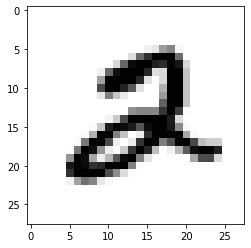

Label = 2


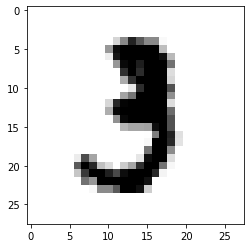

Label = 3


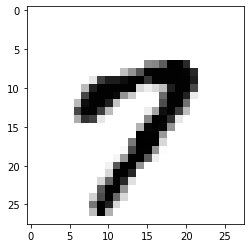

Label = 7


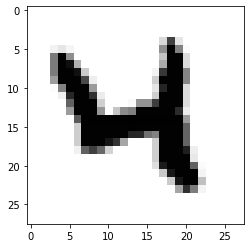

Label = 4


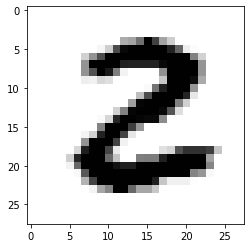

Label = 2


In [5]:
for i in range(5, 30, 5):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

### 1.2 Prepare the data for training

As is the case with all machine learning problems, preparing the data is an important step. Without careful data preparation even the best models will produce poor results, or even fail to execute. 

The MNIST images are stored as a 3-d tensor. Each image tensor has dimensions $6000\ x\ 28\ x\ 28$. However, to train a neural network on these images we must flatten this representation so that each image is a vector of length $28 * 28$. The result will be a 2-d tensor of dimensions $60000\ x\ (28*28)$.

Further, models created with Keras, and most other deep learning frameworks, operate on floating point numbers. The gray scale pixel values of the images are coded as integers in the range $\{ 0, 255 \}$. These pixel values must be coerced to floating point and then standardized to be in a range $\{ 0.0, 1.0 \}$. As is the case for training many machine learning models, it is best to use standardized values for training deep neural networks. 

The code in the cell below flattens the images and converts the pixel values to a standardized floating point number.

In [6]:
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


Notice the original shape and resulting shape of the training image tensor. In addition, the array is now of type `float32`. 

Executing the code in the cell below to apply the  same transformation to the test images. 

In [7]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 28, 28) (10000,)
(10000, 784)


Since we are working on a classification problem, the label values must be of a categorical type. Let's check these labels. 

In [8]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


The labels are coded as integers corresponding to the digit in the image. These values must be coerced to a categorical type. For Keras, categorical types must be **one hot encoded**. One hot encoding is a set of binary columns, one for each category.       

Fortunately the `to_categorical` method in the `keras.utils.np_utils` package does just this.

In [9]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Notice that the label values have been converted from integers to a set of **10 dummy variables** of the one hot encoding. The columns of the dummy variables represent digits in the range $\{ 0,9 \}$. One dummy variable per case will be coded as $1$ and the rest coded as $0$. For example the first row in the example above encodes a $2$, and the second row encodes a $1$.

Executing the code in the cell below to coerce the test labels to dummy variables. 

In [10]:
test_labels = ku.to_categorical(test_labels)

### 1.3  Defining a sequential model

The data is prepared, so it is time to start defining a neural nework model. A simple feedforward model is used which is one type of sequential model Keras can create. The squential model is defined as follows:
1. A sequential model object `nn` is defined. 
2. A single hidden layer is defined. 
  - This layer is dense (fully connected) with 512 units. 
  - The activation of each unit is rectilinear.
  - The hidden layer is expecting an input tensor of $28*28$ by an undefined number of cases (images). 
3. The output layer has 10 hidden units. 
  - We need 10 units since there are 10 categories of handwritten digits we are classifing. 
  - This is a **Multinomial** classification problem so we are using softmax activation. 
  
Let's execute this code to define the model. 

In [11]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nn.add(layers.Dense(10, activation = 'softmax'))

### 1.4 Training and evaluating the sequential model

With a defined model it is time to train and evaluate it. First, the model must be compiled by executing the code below. This call specifies the following:

1. Specify an optimizer. 
2. Specify a loss function. In this case we are performing Multinomial classification so we are using `categorical_crossentropy`.
3. Specify one or more metrics used to evaluate the performance of the model. In this case we are using just one metric, accuracy. 

In [12]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Now, the model is ready to be trained using the `fit` method by executing the code in the cell below. The `fit` method has several arguments:

1. The training features.
2. The training labels.
3. The number of epochs (iterations) over which the model is trained.
4. The batch size used for the optimizer.

In [13]:
nr.seed(9898)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

W0814 16:08:57.360511  9656 deprecation.py:323] From C:\Users\Takesh\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2575 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1041 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0687 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0502 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0373 - accuracy: 0.9887


Notice that the loss declines and the accuracy increases with each training epoch. However, since neural networks tend to be over-fit, these improved figures may or may not indicate that the model is actually getting better. Keep in mind that the model may simply be learning the training data. 

It is necessary to test the model on independent data set. The `evaluate` method allows you to do just this. Executing the code in the cell below and compare the results to training results.  

In [14]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0672 - accuracy: 0.9807


[0.06716989181343233, 0.9807]

It appears that the model is over-fit since the evaluation loss and accuracy are a bit worse than observed in training. 

## Training over epochs

In order to determine at what point a model is overfit during training it is necessary to evaluate the model after each training epoch. A `history` object is created which contains the history of various metrics during the training or fitting process. 

Notice that the `validation_data` argument must be specified so that performance of the model can be computed at the end or each epoch. The printed history of the training will include the validation loss and validation accuracy for each epoch. 

In [15]:
## Define a sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model. 
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
 
## Fit the model saving the results to a history file 
nr.seed(4678)   
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2570 - accuracy: 0.9252 - val_loss: 0.1299 - val_accuracy: 0.9592
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1027 - accuracy: 0.9691 - val_loss: 0.0852 - val_accuracy: 0.9741
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0726 - val_accuracy: 0.9767
Epoch 4/10
60

To aid in understanding these figures it will help to make some plots comparing the training and evaluation performance as the training epochs evolve. The code in the next two cells does this is a somewhat primitive manner. The Numpy array is manually edited to include the training loss and training accuracy. 

The `plot_loss` and `plot_accuracy` functions, in the next two cell, plot the training loss or accuracy in blue and the test loss or accuracy in red. Executing the code and examine the plots. 

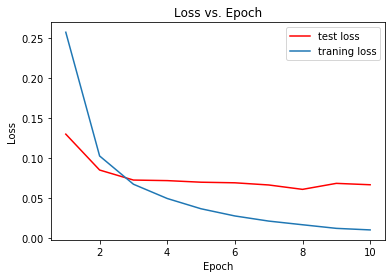

In [16]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)  

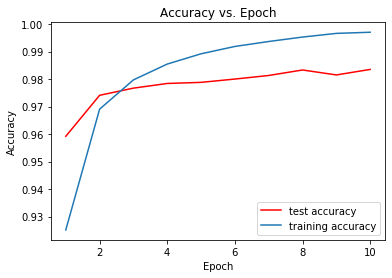

In [17]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)    

Notice that the training loss and accuracy continue to improve throughout the epochs. However, the evaluation loss and accuracy only improve significantly for the first four, or perhaps 5, epochs. This is clear evidence that subsequent epochs are simply over-fitting the model. 

## Adding hidden layers

Next, we will add an additional hidden layer to the model. Additional layers add capacity to the model to represent complex function. However, the network becomes more susceptible to over fitting.

The code in the cell below defines a model similar to the first one, but with a second layer defined. Notice that the definition of the two layer model is nearly the same as for the single layer model. In this case, the second layer has the same number of units and activation function as the first. 

However, notice that the `input_shape` does not need to be defined for hidden layers past the first. Keras will determine the dimensions of tensors passed between layers beyond the input. 

In [18]:
## Define a sequential model
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(512, activation = 'relu'))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
    
## Fit the model, saving the results to a history file.         
nr.seed(2432)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2191 - accuracy: 0.9316 - val_loss: 0.1083 - val_accuracy: 0.9655
Epoch 2/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0803 - accuracy: 0.9755 - val_loss: 0.0775 - val_accuracy: 0.9777
Epoch 3/20
60000/60000 [======

As before, we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Executing the code in the two cells below to display these plots and study the results. 

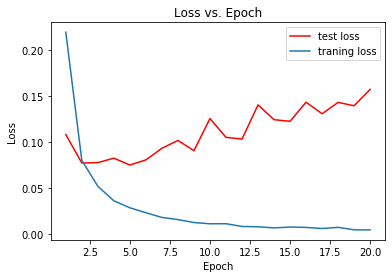

In [19]:
plot_loss(history)  

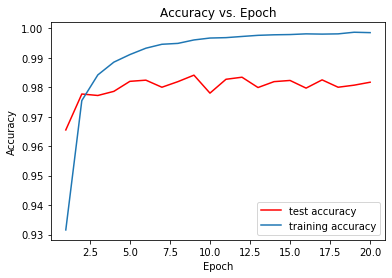

In [20]:
plot_accuracy(history)    

Notice that after epoch four the test loss actually increases, whereas the training loss continues to decrease. This is a clear indication of overfitting. 

When compared to the single layer, the over-fitting is more obvious. This should not be a suprise, since the number of weights has nearly doubled from the single layer model. 

## Adding regularization to the model

Regularization is used to prevent over-fitting of machine learning models including neural networks. The Keras `regularizers` package provides L1 and L2 regularization methods. 

The code in the cell below adds the `kernel_regularizer` argument with the value of `regularizers.l2(0.01)` This adds a weight decay penalty of 0.01 to the model weights. 

In [21]:
## Define the layers of the sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                        kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimzer object and compile the model
optimizer = RMSprop()
nnt.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
## Fit the compiled model 
nr.seed(8765)   
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.6380 - accuracy: 0.9228 - val_loss: 0.2962 - val_accuracy: 0.9652
Epoch 2/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2658 - accuracy: 0.9609 - val_loss: 0.2746 - val_accuracy: 0.9450
Epoch 3/20
60000/60000 [====

Once again, we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Executing the code in the two cells below to display these plots and study the results. 

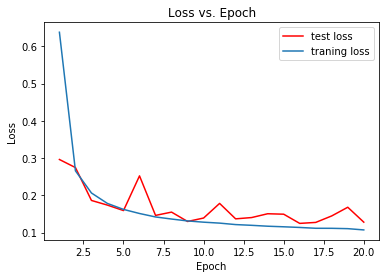

In [22]:
plot_loss(history)  

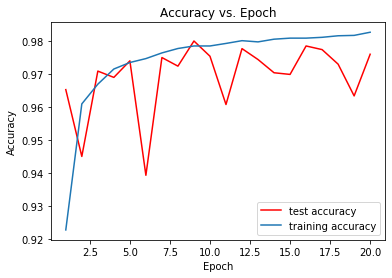

In [23]:
plot_accuracy(history)    

Comparing these results to the previous un-regularized model. 

###### We can conclude that the model with regularization performed better and was more consistence with the results (didn't overfit the data)